In [1]:
import pandas as pd
import numpy as np

The dataset contains all available data for more than 800,000 consumer loans issued from 2007 to 2015 by Lending Club: a large US peer-to-peer lending company. There are several different versions of this dataset. We have used a version available on kaggle.com. You can find it here: https://www.kaggle.com/wendykan/lending-club-loan-data/version/1 We divided the data into two periods because we assume that some data are available at the moment when we need to build Expected Loss models, and some data comes from applications after. Later, we investigate whether the applications we have after we built the Probability of Default (PD) model have similar characteristics with the applications we used to build the PD model.

# Importing Data

In [2]:
df  = pd.read_csv('loan_data_2007_2014.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


To display ALL the colunms in a dataframe

In [3]:
pd.options.display.max_columns = None

In [4]:
df.head(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [6]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

As we can see the year column has special charecters and it is a string. Below it's how to remove the strings in the number of years in employment term to int, we create a new column

In [7]:
df['employed_length'] = df['emp_length'].str.replace('years', '')
df['employed_length'] = df['employed_length'].str.replace('< 1 year', str(0))
df['employed_length'] = df['employed_length'].str.replace('nan', str(0))
df['employed_length'] = df['employed_length'].str.replace('+', '')
df['employed_length'] = df['employed_length'].str.replace(' year', '')
df['employed_length'] = df['employed_length'].str.replace(' ', '')

In [8]:
df['employed_length'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [9]:
df['employed_length'] = pd.to_numeric(df['employed_length'])

In [10]:
df['employed_length'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

In [11]:
type(df['employed_length'][1])

numpy.float64

In [12]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

As we can see the term column has special charecters and it is a string. Below it's how to remove the strings in the number of years in employment term to int, we create a new column

In [13]:
df['loan_term'] = df['term'].str.replace(' ', '')
df['loan_term'] = df['loan_term'].str.replace('months', '')

In [14]:
df['loan_term'].unique()

array(['36', '60'], dtype=object)

In [15]:
df['loan_term'] = pd.to_numeric(df['loan_term'])

In [16]:
type(df['loan_term'][0])

numpy.int64

In [17]:
df['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

In [18]:
#df['issue_date'] = lambda i: dt.datetime(int(i[5:9]),int(i[9:11])).strftime('%b-%y')

In [19]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

To change dates to datetime for the following columns.

In [20]:
df['issue_date'] = pd.to_datetime(df['issue_d'], format = '%b-%y')
df['earliest_credit_line_date'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%y')
df['last_payment_date'] = pd.to_datetime(df['last_pymnt_d'], format = '%b-%y')
df['last_credit_pull_date'] = pd.to_datetime(df['last_credit_pull_d'], format = '%b-%y')

In [21]:
type(df['issue_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

To check the TIME since the earliest credit line was issued to use it for regression. Since we have the 
'earliest_credit_line_date' we can use the current date to determine that. But since the data is out dated, for this date we'll use 2017-12-01

In [22]:
pd.to_datetime('2017-12-01') - df['issue_date']

0        2192 days
1        2192 days
2        2192 days
3        2192 days
4        2192 days
            ...   
466280   1430 days
466281   1430 days
466282   1430 days
466283   1430 days
466284   1430 days
Name: issue_date, Length: 466285, dtype: timedelta64[ns]

In [23]:
# To convert it to MONTHS 
    
df['months_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['issue_date'])
                                                         / np.timedelta64(1, 'M')))
# np.timedelta64(1, 'M') this expression converts time difference in days to months

In [24]:
df['months_since_earliest_cr_line'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: months_since_earliest_cr_line, dtype: float64

In [25]:
# If we had negative min of months, this how we would solve it:

# 1. Explore the observations we calculated from our 'months_since_earliest_cr_line' where the number is negative 
# df.loc[: , ['earliest_cr_line','earliest_credit_line_date','months_since_earliest_cr_line']]['months_since_earliest_cr_line'] < 0]

# 2. We assign these values with the MAX of the column
# df['months_since_earliest_cr_line'][df['months_since_earliest_cr_line'] < 0] = df['months_since_earliest_cr_line'].max()

# Creating Dummy variables

Since there will be predictions that will be conducted to determine whether a customer is eligible for loan. It is best that we make dummy variables for discrete and categorical variables.

In [26]:
pd.get_dummies(df['grade'])

,A,B,C,D,E,F,G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [27]:
pd.get_dummies(df['grade'], prefix = 'grade', prefix_sep = ':')

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


Now we create a new dataframe for the Dummy variables of all the categorical columns

In [28]:
df_dummies = [pd.get_dummies(df['grade'], prefix = 'grade', prefix_sep = ':'),
              pd.get_dummies(df['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
              pd.get_dummies(df['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
              pd.get_dummies(df['verification_status'], prefix = 'graverification_statusde', prefix_sep = ':'),
              pd.get_dummies(df['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
              pd.get_dummies(df['purpose'], prefix = 'purpose', prefix_sep = ':'),
              pd.get_dummies(df['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
              pd.get_dummies(df['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [29]:
# To make a dataframe we concat with pd.dataframe

df_dummies = pd.concat(df_dummies, axis = 1)

In [30]:
type(df_dummies)

pandas.core.frame.DataFrame

In [31]:
df = pd.concat([df, df_dummies], axis = 1)

In [32]:
# Checking for missing values and  clean
#pd.options.display.max_rows = None
df.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                        ..
addr_state:WI            0
addr_state:WV            0
addr_state:WY            0
initial_list_status:f    0
initial_list_status:w    0
Length: 208, dtype: int64

In [33]:
df['total_rev_hi_lim'].fillna(df['funded_amnt'],inplace = True)

In [34]:
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace = True)

In [35]:
df['delinq_2yrs'].fillna(0, inplace = True)
df['inq_last_6mths'].fillna(0, inplace = True)
df['open_acc'].fillna(0, inplace = True)
df['pub_rec'].fillna(0, inplace = True)
df['total_acc'].fillna(0, inplace = True)
df['acc_now_delinq'].fillna(0, inplace = True)
df['total_rev_hi_lim'].fillna(0, inplace = True)
df['employed_length'].fillna(0, inplace = True)
df['months_since_earliest_cr_line'].fillna(0, inplace = True)

# PD MODEL DATA PREPARATION

In [36]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [37]:
# Count how many accounts are there for each status

df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [38]:
# To see the proportion of accounts by status - we divide the value_count expression with the total count

df['loan_status'].value_counts() / df['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [39]:
# Create a more precise Default definition(Good-Bad) with dummy variables

df['good_bad'] = np.where(df['loan_status'].isin(['Charged Off','Default',
                                                  'Does not meet the credit policy. Status:Charged Off',
                                                  'Late (31-120 days)']), 0, 1) # Theses are all bad or defaulted accounts
                                                                                # 0 = True - the loan has a default status
                                                                                # 1 = False - the loan has no default status

In [40]:
#df['good_bad']

Splitting the data

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# Our input and outputs comes from Df dataframe. Our input is everything in the DF dataframe and output is the 'good_bad' column
# In train_test_split(input, out)

#train_test_split(df.drop('good_bad', axis = 1), df['good_bad'])

In [43]:
df_inputs_train,df_inputs_test,df_targets_train,df_targets_test = train_test_split(df.drop('good_bad', axis = 1), 
                                                                                   df['good_bad'])

In [44]:
df_inputs_train.shape

(349713, 208)

In [45]:
df_inputs_test.shape

(116572, 208)

In [46]:
df_targets_train.shape

(349713,)

In [47]:
df_targets_test.shape

(116572,)

In [48]:
df_inputs_train,df_inputs_test,df_targets_train,df_targets_test = train_test_split(df.drop('good_bad', axis = 1), 
                                                                                   df['good_bad'], test_size = 0.2,
                                                                                   random_state = 42)

In [49]:
df_inputs_train.shape

(373028, 208)

In [50]:
df_inputs_test.shape

(93257, 208)

In [51]:
df_targets_train.shape

(373028,)

In [52]:
df_targets_test.shape

(93257,)

# Data Preparation

1. Create a dataframe for all the pre-processing

In [53]:
df_input_prep = df_inputs_train # independents variables
df_targets_prep = df_targets_train # dependents variables

#df_input_prep = df_inputs_test
#df_targets_prep = df_targets_test

#####
#df_inputs_prepr = loan_data_inputs_train
#df_targets_prepr = loan_data_targets_train
#####
#df_inputs_prepr = loan_data_inputs_test
#df_targets_prepr = loan_data_targets_test

2. To assess the explanatory power all the inputs columns with respect to the outcome of interest that is being a good or bad borrower. We going to use 'grade' column for an example.

In [54]:
# Check for unique values using our pre-pro df

df_input_prep['grade'].unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [55]:
# Create a new dataframe to store only the independent variable 'grade' from df_inputs_prep and the dependent 'good_bad' from
# df_targets_prep dataframe

df1  = pd.concat([df_input_prep['grade'], df_targets_prep], axis = 1)
df1

,grade,good_bad
427211,A,1
206088,C,1
136020,A,1
412305,D,0
36159,C,0
...,...,...
259178,B,1
365838,B,1
131932,B,1
146867,B,1


3. To calculate the Weight of Evidence for this variable

In [56]:
# Count the number of borrowers for each grade, we going to group 'grade'- we going to do that by indexing the columns because
# want the df to be reusable.

df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,59759
1,B,109730
2,C,100245
3,D,61498
4,E,28612
5,F,10530
6,G,2654


In [57]:
# We need the proportion of good borrowers and bad borrowers are within each group. This can be summerized either by proportion 
# of good borrowers or bad borrowers, it doesn't matter which one, since proportion of good borrowers = 1 - proportion of bad
# borrowers. To calculate the prop of good borrowers,we going to use the average of good_bad

df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.961044
1,B,0.921015
2,C,0.885770
3,D,0.846304
4,E,0.805257
5,F,0.754416
6,G,0.727958


In [58]:
# Now merge the aboves results into one dataframe

df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)
    
df1    

,grade,good_bad,grade,good_bad
0,A,59759,A,0.961044
1,B,109730,B,0.921015
2,C,100245,C,0.885770
3,D,61498,D,0.846304
4,E,28612,E,0.805257
5,F,10530,F,0.754416
6,G,2654,G,0.727958


In [59]:
# Drop one the 'grade' column because they have the same values

df1 = df1.iloc[ : ,[0,1,3]]
df1

,grade,good_bad,good_bad
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


In [60]:
# The columns names need to be more meaningful, so change df1[1] to observations and df1[2] to proportion of good borrowers

df1.columns = [df1.columns.values[0], 'NumOfObser', 'PropOfGood']
df1             

,grade,NumOfObser,PropOfGood
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


In [61]:
# We going to use these two columns for calculations of WoE and Information Value.
# To calculate the Propr of Observation that falls in each grade

df1['PropObs'] = df1['NumOfObser'] / df1['NumOfObser'].sum()
df1

,grade,NumOfObser,PropOfGood,PropObs
0,A,59759,0.961044,0.160200
1,B,109730,0.921015,0.294160
2,C,100245,0.885770,0.268733
3,D,61498,0.846304,0.164862
4,E,28612,0.805257,0.076702
5,F,10530,0.754416,0.028228
6,G,2654,0.727958,0.007115


In [62]:
# Calculate the number of good borrowers and number of bad borrowers by grade group. 
# good_borrowers = prop_good * totalNumberOfObser in respective to the grade

df1['NumGoodBorrowers'] = df1['PropOfGood'] * df1['NumOfObser']
df1['NumBadBorrowers'] = (1 - df1['PropOfGood']) * df1['NumOfObser']
df1

,grade,NumOfObser,PropOfGood,PropObs,NumGoodBorrowers,NumBadBorrowers
0,A,59759,0.961044,0.160200,57431.0,2328.0
1,B,109730,0.921015,0.294160,101063.0,8667.0
2,C,100245,0.885770,0.268733,88794.0,11451.0
3,D,61498,0.846304,0.164862,52046.0,9452.0
4,E,28612,0.805257,0.076702,23040.0,5572.0
5,F,10530,0.754416,0.028228,7944.0,2586.0
6,G,2654,0.727958,0.007115,1932.0,722.0


In [63]:
# We calculate the proportion of good borrowers and bad borrowers of each grade.
# the percentage of good borrowers in respective grade category = number of good in respective category / totalGoodBorrowers

df1['PercntcOfGoodPerGrade'] = df1['NumGoodBorrowers'] / df1['NumGoodBorrowers'].sum()
df1['PercntOfBadPerGrade'] = df1['NumBadBorrowers'] / df1['NumBadBorrowers'].sum()
df1

,grade,NumOfObser,PropOfGood,PropObs,NumGoodBorrowers,NumBadBorrowers,PercntcOfGoodPerGrade,PercntOfBadPerGrade
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706


In [64]:
# To calculate the WoE for the grade column: WoE = log(prop of good obs / prop of bad)

df1['WoE'] = np.log(df1['PercntcOfGoodPerGrade'] / df1['PercntOfBadPerGrade'])
df1

,grade,NumOfObser,PropOfGood,PropObs,NumGoodBorrowers,NumBadBorrowers,PercntcOfGoodPerGrade,PercntOfBadPerGrade,WoE
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459


In [65]:
# It is useful to sort the data by WoE to see which category has the highest default rate

df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop = True)
df1

,grade,NumOfObser,PropOfGood,PropObs,NumGoodBorrowers,NumBadBorrowers,PercntcOfGoodPerGrade,PercntOfBadPerGrade,WoE
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830


In [66]:
# To calculate the Information Value(IV).
# IV = ((Proportion of good borrowers - Proportion of bad borrowers) * WoE).sum()
# 

df1['IV'] = (df1['PercntcOfGoodPerGrade'] - df1['PercntOfBadPerGrade']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

,grade,NumOfObser,PropOfGood,PropObs,NumGoodBorrowers,NumBadBorrowers,PercntcOfGoodPerGrade,PercntOfBadPerGrade,WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,0.288636
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.288636
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.288636
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.288636
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.288636
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.288636


# To automate for other discrete variables or columns

In [67]:
# Create a function to perform all calculations for any given pair of categorical variables and dependent variables
# df - for our independent variables dataframe

def WoE_discrete(df, discrete_variable_name, dependent_variable_name):
    #1. concat the two variables from processed df
    df = pd.concat([df[discrete_variable_name], dependent_variable_name], axis = 1) 
    
    #2. Calculate the number of observations and proportion of good borrowers for each discrete variable
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    
    #3. Copy all subsequential expressions
    df = df.iloc[ : ,[0,1,3]]
    df.columns = [df.columns.values[0], 'NumOfObser', 'PropOfGood']
    df['PropObs'] = df['NumOfObser'] / df['NumOfObser'].sum()
    df['NumGoodBorrowers'] = df['PropOfGood'] * df['NumOfObser']
    df['NumBadBorrowers'] = (1 - df['PropOfGood']) * df['NumOfObser']
    df['PercntcOfGoodPerGrade'] = df['NumGoodBorrowers'] / df['NumGoodBorrowers'].sum()
    df['PercntOfBadPerGrade'] = df['NumBadBorrowers'] / df['NumBadBorrowers'].sum()
    df['WoE'] = np.log(df['PercntcOfGoodPerGrade'] / df['PercntOfBadPerGrade'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['IV'] = (df['PercntcOfGoodPerGrade'] - df['PercntOfBadPerGrade']) * df['WoE']
    df['IV'] = df['IV'].sum()
    
    #4. Return the df
    return df

In [68]:
df_WoE = WoE_discrete(df_input_prep, 'grade', df_targets_prep)
df_WoE

,grade,NumOfObser,PropOfGood,PropObs,NumGoodBorrowers,NumBadBorrowers,PercntcOfGoodPerGrade,PercntOfBadPerGrade,WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,0.288636
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.288636
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.288636
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.288636
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.288636
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.288636


# Processing discrete variables: Visualizing Resulting

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [70]:
# Create a function to plot by WoE dataframe

def df_WoE_plot(df_WoE, rotation_on_Xaxis_label = 0):
    x = np.array(df_WoE.iloc[ : , 0].apply(str)) # for the x_axis with any discrete column on the first position
    y = df_WoE['WoE'] # the WoE column of every categorical or discrete variable
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title('Weight of Evidence by ' + df_WoE.columns[0])
    plt.xticks(rotation = rotation_on_Xaxis_label)

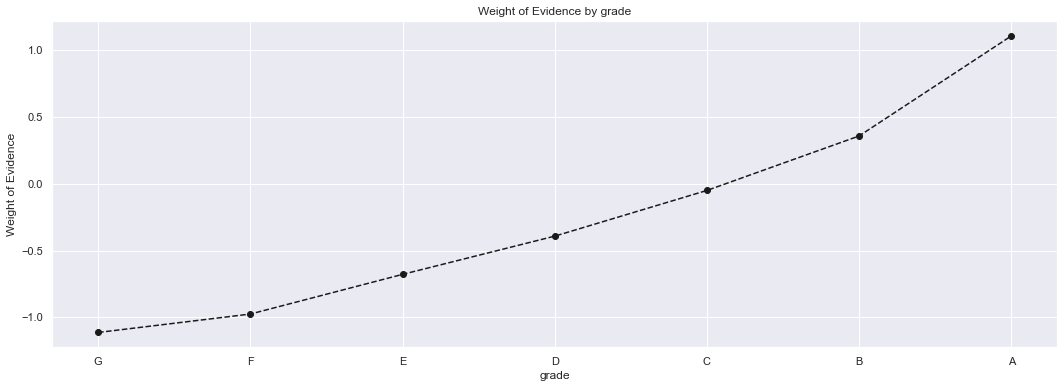

In [71]:
df_WoE_plot(df_WoE)

In [72]:
df_WoE = WoE_discrete(df_input_prep, 'home_ownership', df_targets_prep)
df_WoE

,home_ownership,NumOfObser,PropOfGood,PropObs,NumGoodBorrowers,NumBadBorrowers,PercntcOfGoodPerGrade,PercntOfBadPerGrade,WoE,IV
0,OTHER,137,0.795620,0.000367,109.0,28.0,0.000328,0.000687,-0.738602,inf
1,NONE,40,0.850000,0.000107,34.0,6.0,0.000102,0.000147,-0.363144,inf
2,RENT,150599,0.873870,0.403720,131604.0,18995.0,0.396099,0.465815,-0.162123,inf
3,OWN,33295,0.892536,0.089256,29717.0,3578.0,0.089442,0.087743,0.019170,inf
4,MORTGAGE,188956,0.903835,0.506546,170785.0,18171.0,0.514026,0.445608,0.142834,inf
5,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,inf


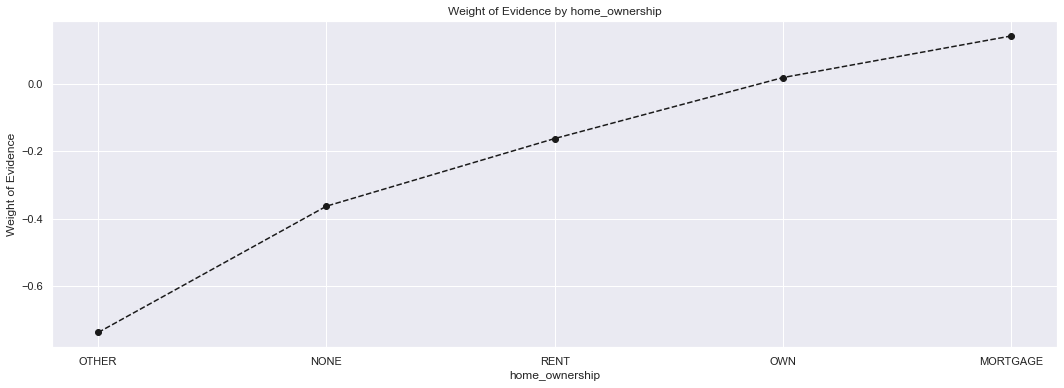

In [73]:
df_WoE_plot(df_WoE)

Processing discrete variables create dummies

In [74]:
# Take values of 'Home_owner' column to make dummies for the low WoE values into one column of dummies ie. 
#Rent, None and Other with Rent as they are the risk categories.

df_input_prep['home_ownership:Rent_Other_None_Any'] = sum([df_input_prep['home_ownership:RENT'],
                                                            df_input_prep['home_ownership:OTHER'],
                                                            df_input_prep['home_ownership:ANY'],
                                                            df_input_prep['home_ownership:NONE']])

More advance Preprocessing for PD Modeling

In [75]:
# In this we will look at addr_state variable

df_input_prep['addr_state'].unique()

array(['SC', 'NJ', 'GA', 'MA', 'CA', 'IL', 'NC', 'NY', 'TX', 'CT', 'FL',
       'VA', 'UT', 'AZ', 'MD', 'WI', 'MI', 'CO', 'TN', 'IN', 'AL', 'NV',
       'MT', 'RI', 'OR', 'MN', 'KS', 'AK', 'PA', 'OH', 'WA', 'KY', 'OK',
       'MO', 'NM', 'HI', 'WV', 'LA', 'VT', 'AR', 'DC', 'SD', 'NH', 'WY',
       'MS', 'DE', 'IA', 'NE', 'ID', 'ME'], dtype=object)

In [76]:
df_WoE_addr_state = WoE_discrete(df_input_prep, 'addr_state', df_targets_prep)
df_WoE_addr_state

,addr_state,NumOfObser,PropOfGood,PropObs,NumGoodBorrowers,NumBadBorrowers,PercntcOfGoodPerGrade,PercntOfBadPerGrade,WoE,IV
0,NE,13,0.461538,0.000035,6.0,7.0,0.000018,0.000172,-2.251896,inf
1,IA,13,0.769231,0.000035,10.0,3.0,0.000030,0.000074,-0.893772,inf
2,NV,5221,0.864585,0.013996,4514.0,707.0,0.013586,0.017338,-0.243837,inf
3,FL,25211,0.875808,0.067585,22080.0,3131.0,0.066456,0.076782,-0.144425,inf
4,HI,2001,0.877061,0.005364,1755.0,246.0,0.005282,0.006033,-0.132852,inf
5,AL,4671,0.877328,0.012522,4098.0,573.0,0.012334,0.014052,-0.130376,inf
6,NM,2075,0.883373,0.005563,1833.0,242.0,0.005517,0.005935,-0.072973,inf
7,VA,11366,0.883864,0.030470,10046.0,1320.0,0.030236,0.032370,-0.068202,inf
8,NY,32211,0.883984,0.086350,28474.0,3737.0,0.085701,0.091643,-0.067037,inf
9,OK,3284,0.884287,0.008804,2904.0,380.0,0.008740,0.009319,-0.064072,inf


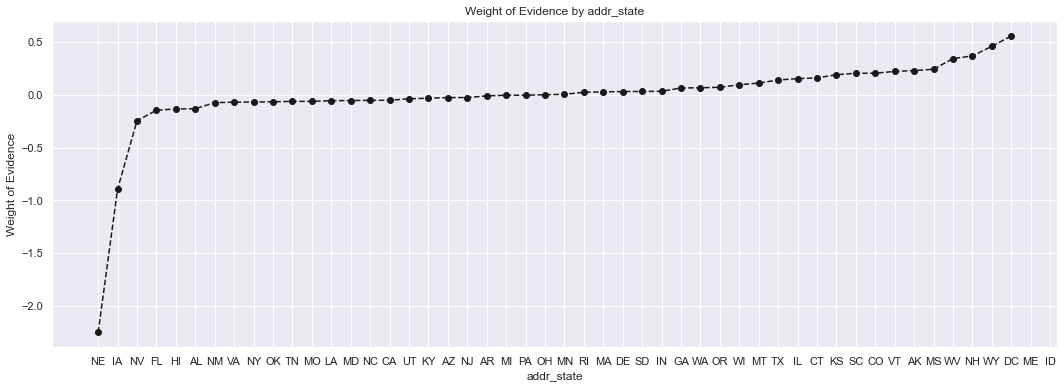

In [77]:
df_WoE_plot(df_WoE_addr_state)

In [78]:
# We see that there is only 50 values or states, that's because one is missing since there's no borrowers from there ie North
# Dakota(ND) so we doing to add a dummy variable of that state for future reference if it happens to have borrowers from there.

if ['add_state:ND'] in df_input_prep.columns.values:
    pass
else:
    df_input_prep['add_state:ND'] = 0

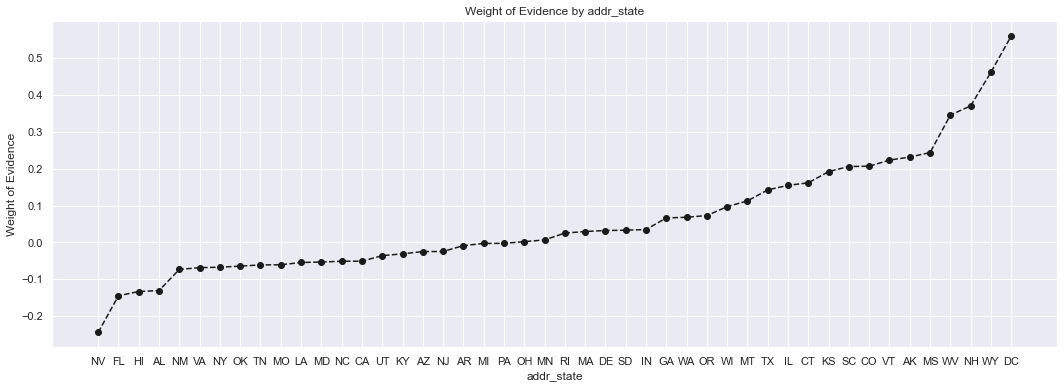

In [79]:
# Since NE, IA, ME and ID have high WoE because of low observations we will put them into High risk and Low risk respectively.
# Plot the without these 4 states

df_WoE_plot(df_WoE_addr_state.iloc[2 : -2, :])

From the above plot we can see that NV,FL,HI,AL,NE,IA and ND can be put in one category, we can also see that the last 6 states
with low risk from WV to DC including the 2 states we left out ME and ID can be put in one category.

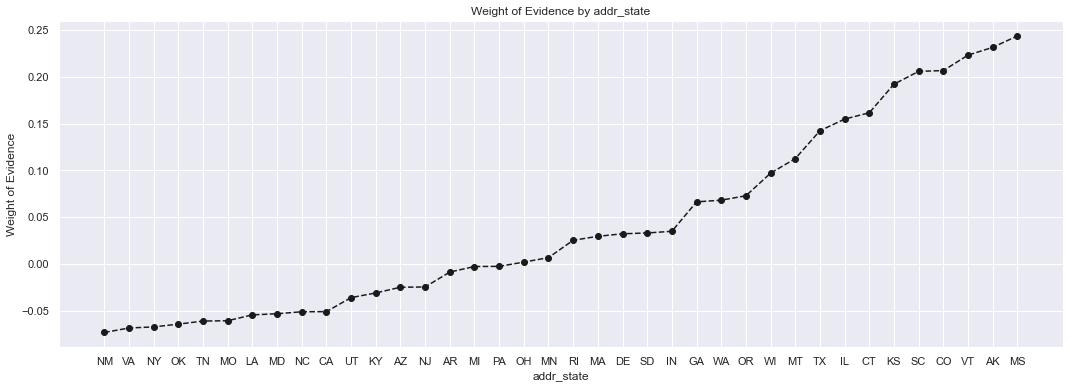

In [80]:
# Now can we look at other 38 states

df_WoE_plot(df_WoE_addr_state.iloc[6 : -6, :])

The above shows that NM to CA have similar WoE score but when looking the number of observations, NY and CA have a higher number.
Thus CA and NY will have their own categories, then NM and VA, OK to NC will have seperate categories. Even though some areas may have the same WoE score but it is important to take inconsideration the number of observation so if a state has a high number of observation it's best to put those in a single group category and the ones with 2 or more in a separate category.

In [81]:
# Now we create the dummy variables for those with 2 or more states

df_input_prep['addr_state:NV_FL_HI_AL_NE_IA_ND'] = sum([df_input_prep['addr_state:NV'], df_input_prep['addr_state:FL'],
                                                       df_input_prep['addr_state:HI'],df_input_prep['addr_state:AL'],
                                                       df_input_prep['addr_state:NE'],df_input_prep['addr_state:IA']])

df_input_prep['addr_state:NM_VA'] = sum([df_input_prep['addr_state:NM'],df_input_prep['addr_state:VA']])

df_input_prep['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_input_prep['addr_state:NC'],df_input_prep['addr_state:MD'],
                                                    df_input_prep['addr_state:LA'],df_input_prep['addr_state:MO'],
                                                    df_input_prep['addr_state:TN'],df_input_prep['addr_state:OK']])

df_input_prep['addr_state:UT_KY_AZ_NJ'] = sum([df_input_prep['addr_state:UT'],df_input_prep['addr_state:KY'],
                                              df_input_prep['addr_state:AZ'],df_input_prep['addr_state:NJ']])

df_input_prep['addr_state:AR_MI_PA_OH_MN'] = sum([df_input_prep['addr_state:AR'],df_input_prep['addr_state:MI'],
                                                 df_input_prep['addr_state:PA'],df_input_prep['addr_state:OH'],
                                                 df_input_prep['addr_state:MN']])

df_input_prep['addr_state:RI_MA_DE_SD_IN'] = sum([df_input_prep['addr_state:RI'],df_input_prep['addr_state:MA'],
                                                 df_input_prep['addr_state:DE'],df_input_prep['addr_state:SD'],
                                                 df_input_prep['addr_state:IN']])

df_input_prep['addr_state:GA_WA_OR'] = sum([df_input_prep['addr_state:GA'],df_input_prep['addr_state:WA'],
                                           df_input_prep['addr_state:OR']])

df_input_prep['addr_state:WI_MT'] = sum([df_input_prep['addr_state:WI'],df_input_prep['addr_state:MT']])

df_input_prep['addr_state:IL_CT'] = sum([df_input_prep['addr_state:IL'],df_input_prep['addr_state:CT']])

df_input_prep['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_input_prep['addr_state:KS'],df_input_prep['addr_state:SC'],
                                                    df_input_prep['addr_state:VT'],df_input_prep['addr_state:AK'],
                                                    df_input_prep['addr_state:MS']])

df_input_prep['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_input_prep['addr_state:WV'],df_input_prep['addr_state:NH'],
                                                    df_input_prep['addr_state:WY'],df_input_prep['addr_state:DC'],
                                                    df_input_prep['addr_state:ME'],df_input_prep['addr_state:ID']])

# Preprocessing of Continuous variables Automating calculations

In [82]:
# Use the same function for calculating WoE for Discrete variabls but changing name of function and sort and reset.


def WoE_ordered_continuous(df, discrete_variable_name, dependent_variable_name):
    #1. concat the two variables from processed df
    df = pd.concat([df[discrete_variable_name], dependent_variable_name], axis = 1) 
    
    #2. Calculate the number of observations and proportion of good borrowers for each discrete variable
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    
    #3. Copy all subsequential expressions
    df = df.iloc[ : ,[0,1,3]]
    df.columns = [df.columns.values[0], 'NumOfObser', 'PropOfGood']
    df['PropObs'] = df['NumOfObser'] / df['NumOfObser'].sum()
    df['NumGoodBorrowers'] = df['PropOfGood'] * df['NumOfObser']
    df['NumBadBorrowers'] = (1 - df['PropOfGood']) * df['NumOfObser']
    df['PercntcOfGoodPerGrade'] = df['NumGoodBorrowers'] / df['NumGoodBorrowers'].sum()
    df['PercntOfBadPerGrade'] = df['NumBadBorrowers'] / df['NumBadBorrowers'].sum()
    df['WoE'] = np.log(df['PercntcOfGoodPerGrade'] / df['PercntOfBadPerGrade'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['DiffOfProprGood'] = df['PropOfGood'].diff().abs()
    df['DiffInWoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['PercntcOfGoodPerGrade'] - df['PercntOfBadPerGrade']) * df['WoE']
    df['IV'] = df['IV'].sum()
    
    #4. Return the df
    return df

Preprocessing of continuous creating dummy variables

In [83]:
# We will use the 'loan_term' variable

df_input_prep['loan_term'].unique()

array([36, 60], dtype=int64)

In [84]:
# Calculate the WoE for this variable using the WoE_continuous function

df_loan_term_WoE = WoE_ordered_continuous(df_input_prep, 'loan_term', df_targets_prep)
df_loan_term_WoE

,loan_term,NumOfObser,PropOfGood,PropObs,NumGoodBorrowers,NumBadBorrowers,PercntcOfGoodPerGrade,PercntOfBadPerGrade,WoE,DiffOfProprGood,DiffInWoE,IV
0,36,270419,0.902995,0.724929,244187.0,26232.0,0.73495,0.643288,0.133209,NaN,NaN,0.039434
1,60,102609,0.858239,0.275071,88063.0,14546.0,0.26505,0.356712,-0.297009,0.044756,0.430218,0.039434


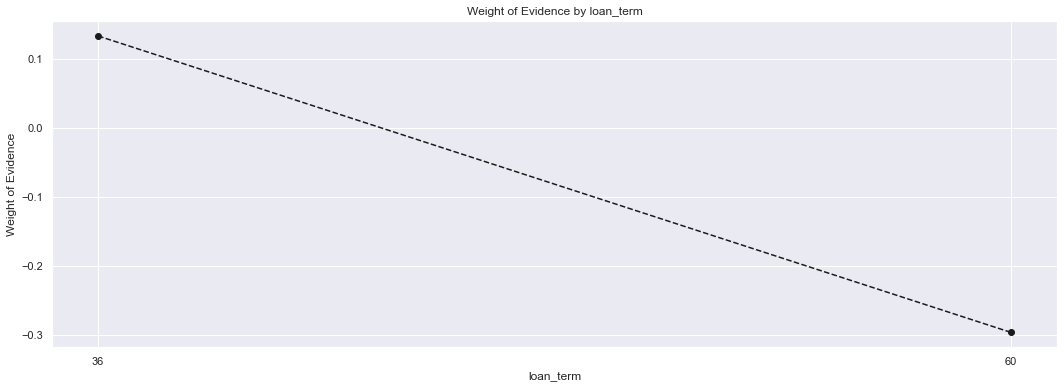

In [85]:
# Plot the df

df_WoE_plot(df_loan_term_WoE)

From the above plot we can see that 60 months loans are riskier than 36 months, so we create dummy variables for both categories

In [86]:
# For the 36 months variable
# np.where(condition, if True, else if False)

df_input_prep['term:36'] = np.where((df_input_prep['loan_term'] == 36),1 ,0)
df_input_prep['term:60'] = np.where((df_input_prep['loan_term'] == 60),1 ,0)

In [87]:
# For the employment term variable

df_input_prep['employed_length'].unique()

array([ 3.,  6., 10.,  7.,  5.,  0.,  2.,  9.,  1.,  8.,  4.])

In [88]:
df_empl_length_WoE = WoE_ordered_continuous(df_input_prep, 'employed_length', df_targets_prep)
df_empl_length_WoE

,employed_length,NumOfObser,PropOfGood,PropObs,NumGoodBorrowers,NumBadBorrowers,PercntcOfGoodPerGrade,PercntOfBadPerGrade,WoE,DiffOfProprGood,DiffInWoE,IV
0,0.0,45720,0.876400,0.122565,40069.0,5651.0,0.120599,0.138580,-0.138975,NaN,NaN,0.006506
1,1.0,23654,0.886996,0.063411,20981.0,2673.0,0.063148,0.065550,-0.037329,0.010596,0.101645,0.006506
2,2.0,33078,0.890955,0.088674,29471.0,3607.0,0.088701,0.088455,0.002785,0.003959,0.040114,0.006506
3,3.0,29205,0.890772,0.078292,26015.0,3190.0,0.078299,0.078228,0.000907,0.000183,0.001878,0.006506
4,4.0,22468,0.890644,0.060231,20011.0,2457.0,0.060229,0.060253,-0.000404,0.000128,0.001311,0.006506
5,5.0,24602,0.884725,0.065952,21766.0,2836.0,0.065511,0.069547,-0.059790,0.005920,0.059387,0.006506
6,6.0,20887,0.883899,0.055993,18462.0,2425.0,0.055567,0.059468,-0.067862,0.000826,0.008071,0.006506
7,7.0,21049,0.887453,0.056427,18680.0,2369.0,0.056223,0.058095,-0.032759,0.003554,0.035102,0.006506
8,8.0,17853,0.889878,0.047860,15887.0,1966.0,0.047816,0.048212,-0.008245,0.002425,0.024515,0.006506
9,9.0,14267,0.886662,0.038246,12650.0,1617.0,0.038074,0.039654,-0.040660,0.003217,0.032416,0.006506


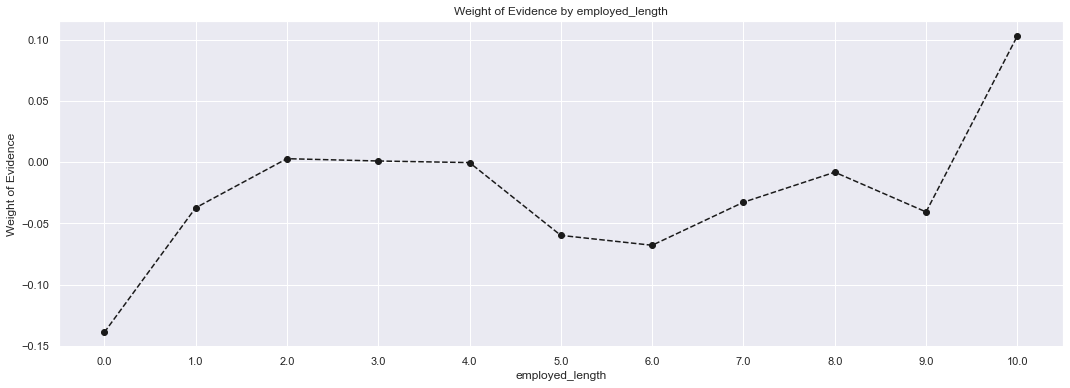

In [89]:
df_WoE_plot(df_empl_length_WoE)

From the above plot, we can categorize the variables as thus: 0, 1, 2 to 4, 5 to 6, 7 to 9 and 10 over

In [90]:
# we going to use the isin function to pass a list of options and a range function

df_input_prep['employment:0'] = np.where(df_input_prep['employed_length'].isin([0]), 1, 0)
df_input_prep['employment:1'] = np.where(df_input_prep['employed_length'].isin([1]), 1, 0)
df_input_prep['employment:2-4'] = np.where(df_input_prep['employed_length'].isin(range(2 , 5)), 1, 0)
df_input_prep['employment:5-6'] = np.where(df_input_prep['employed_length'].isin(range(5, 7)), 1, 0)
df_input_prep['employment:7-9'] = np.where(df_input_prep['employed_length'].isin(range(7, 10)), 1, 0)
df_input_prep['employment:10+'] = np.where(df_input_prep['employed_length'].isin([10]), 1, 0)

Now we going to work with a more complex one

In [91]:
df_input_prep['months_since_earliest_cr_line'].unique()

array([ 45.,  64.,  54.,  44., 101.,  37.,  91.,  53.,  42.,  57.,  58.,
        43.,  40.,  51.,  59., 113.,  50.,  62.,  49.,  47.,  48.,  41.,
        38.,  66.,  69.,  87.,  46.,  76.,  63.,  39.,  61.,  89.,  65.,
        56.,  79.,  68.,  52.,  60.,  73.,  74.,  70.,  88.,  81.,  82.,
        55., 103.,  83.,  72.,  85.,  36.,  71.,  92.,  77.,  67.,  84.,
        86.,  90., 116.,  93.,  95.,  78.,  75.,  80.,  96.,  94.,  98.,
       104., 125., 105., 118., 110., 119., 114.,  97., 102., 106., 100.,
       122., 121., 108., 117., 120., 124.,  99., 115., 112., 109., 123.,
       107., 126., 111.])

In [92]:
# Since we have about 90 values,we can still work with them without any complications. But it is best to work with 50 or less
# values. So we going to use Pandas Cut() method to categorise the values. Cut(Series/column, number of categories)

df_input_prep['months_since_issue_date_factor'] = pd.cut(df_input_prep['months_since_earliest_cr_line'], 50)

In [93]:
# Now we see that with every row there's an interval

df_input_prep['months_since_issue_date_factor']

427211      (43.2, 45.0]
206088      (63.0, 64.8]
136020      (52.2, 54.0]
412305      (43.2, 45.0]
36159     (100.8, 102.6]
               ...      
259178     (35.91, 37.8]
365838      (41.4, 43.2]
131932      (52.2, 54.0]
146867      (55.8, 57.6]
121958      (52.2, 54.0]
Name: months_since_issue_date_factor, Length: 373028, dtype: category
Categories (50, interval[float64]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [94]:
# Let's calculate the WoE for the new variable

df_Months_issue_date_WoE = WoE_ordered_continuous(df_input_prep,'months_since_issue_date_factor', df_targets_prep)
df_Months_issue_date_WoE

,months_since_issue_date_factor,NumOfObser,PropOfGood,PropObs,NumGoodBorrowers,NumBadBorrowers,PercntcOfGoodPerGrade,PercntOfBadPerGrade,WoE,DiffOfProprGood,DiffInWoE,IV
0,"(35.91, 37.8]",28170,0.942244,0.075517,26543.0,1627.0,0.079889,0.039899,0.694283,NaN,NaN,0.113186
1,"(37.8, 39.6]",39636,0.928424,0.106255,36799.0,2837.0,0.110757,0.069572,0.464979,0.013820,0.229305,0.113186
2,"(39.6, 41.4]",38614,0.917284,0.103515,35420.0,3194.0,0.106606,0.078327,0.308258,0.011140,0.156721,0.113186
3,"(41.4, 43.2]",29038,0.908603,0.077844,26384.0,2654.0,0.079410,0.065084,0.198945,0.008681,0.109313,0.113186
4,"(43.2, 45.0]",28367,0.901787,0.076045,25581.0,2786.0,0.076993,0.068321,0.119498,0.006815,0.079447,0.113186
5,"(45.0, 46.8]",12165,0.899301,0.032611,10940.0,1225.0,0.032927,0.030041,0.091740,0.002486,0.027758,0.113186
6,"(46.8, 48.6]",24451,0.898900,0.065547,21979.0,2472.0,0.066152,0.060621,0.087315,0.000401,0.004425,0.113186
7,"(48.6, 50.4]",22969,0.888328,0.061574,20404.0,2565.0,0.061412,0.062902,-0.023972,0.010572,0.111287,0.113186
8,"(50.4, 52.2]",20640,0.880523,0.055331,18174.0,2466.0,0.054700,0.060474,-0.100350,0.007804,0.076378,0.113186
9,"(52.2, 54.0]",18312,0.866863,0.049090,15874.0,2438.0,0.047777,0.059787,-0.224240,0.013660,0.123890,0.113186


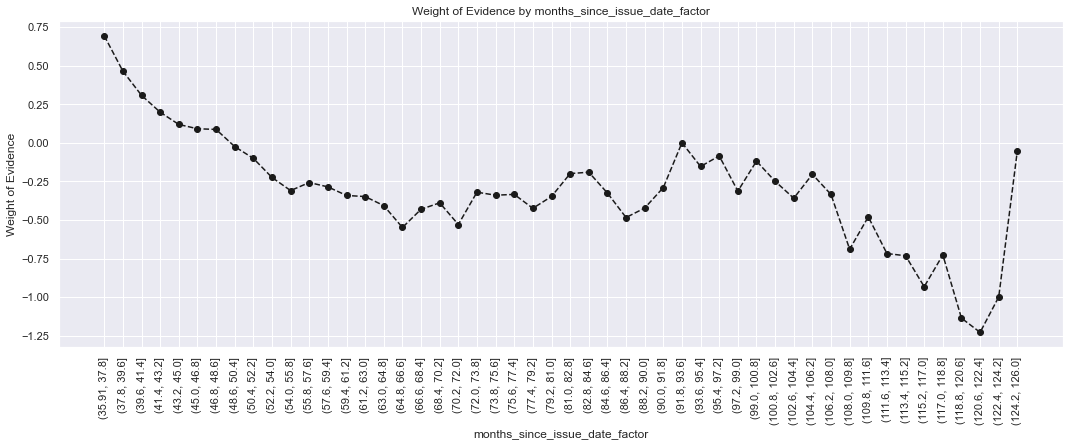

In [95]:
df_WoE_plot(df_Months_issue_date_WoE, 90)

The above plot showcase that the first three categories differ from each other in terms of WoE and the next category, thus we will keep them for final
model. So we will plot from 4th category.

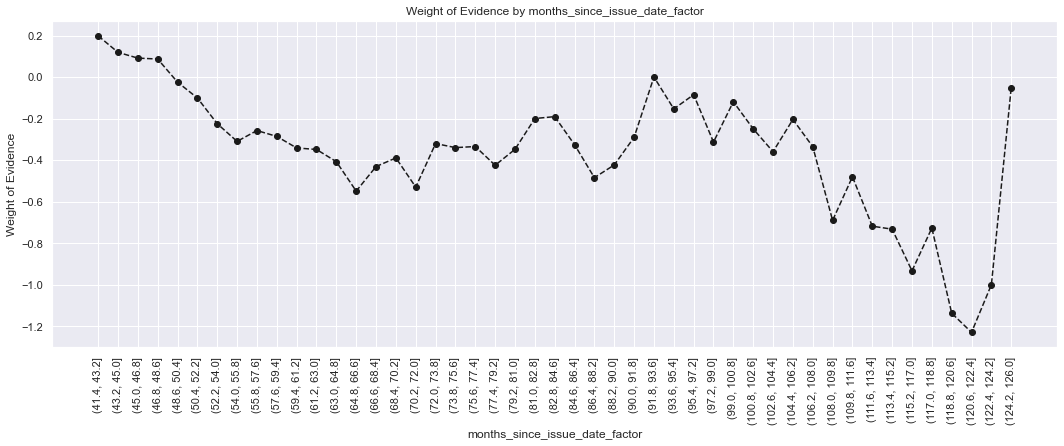

In [96]:
df_WoE_plot(df_Months_issue_date_WoE.iloc[3: ,: ], 90)

From the above plot we can make categories as follows: 42 - 48, 49 - 52, 53 - 64. From 65 onwards we see that the plot starts
to make a up and down spiral, from this we have look at the number of observation for the plots. We notice that number of observations
don't differ that much and there's no hight or spike in them therefore we can create one category from 65 onwards or we can make
2 categories.

In [97]:
df_input_prep['months_issue_date:<38'] = np.where(df_input_prep['months_since_earliest_cr_line'].isin(range(38)),1 ,0)
df_input_prep['months_issue_date:<38'] = np.where(df_input_prep['months_since_earliest_cr_line'].isin(range(38, 40)),1 ,0)
df_input_prep['months_issue_date:<38'] = np.where(df_input_prep['months_since_earliest_cr_line'].isin(range(40, 42)),1 ,0)
df_input_prep['months_issue_date:<38'] = np.where(df_input_prep['months_since_earliest_cr_line'].isin(range(42, 49)),1 ,0)
df_input_prep['months_issue_date:<38'] = np.where(df_input_prep['months_since_earliest_cr_line'].isin(range(49, 53)),1 ,0)
df_input_prep['months_issue_date:<38'] = np.where(df_input_prep['months_since_earliest_cr_line'].isin(range(53, 65)),1 ,0)
df_input_prep['months_issue_date:<38'] = np.where(df_input_prep['months_since_earliest_cr_line'].isin(range(65, 85)),1 ,0)
df_input_prep['months_issue_date:<38'] = np.where(df_input_prep['months_since_earliest_cr_line'].isin(range(85, 
                                                            int(df_input_prep['months_since_earliest_cr_line'].max()))),1 ,0)

In [98]:
# Let's do the same for interest rate

df_input_prep['int_rate'].unique()

array([ 8.9 , 14.33, 16.59, 12.84,  7.49, 10.62, 20.31,  9.17, 15.31,
       16.49,  9.67, 15.8 , 13.65, 14.64, 22.15, 12.49, 10.15, 18.55,
       11.14, 10.64, 15.1 , 16.29, 17.57, 13.67, 11.99, 16.2 , 15.61,
       16.99,  7.12, 12.99, 12.12, 16.78, 11.67, 13.35,  7.51, 18.25,
       10.59, 13.99, 23.1 ,  6.03, 14.16, 13.11, 20.99, 22.2 , 10.99,
       18.85, 19.52, 23.83, 22.45,  7.69, 20.2 ,  6.62, 11.86, 14.09,
       18.49,  9.99,  7.9 , 14.3 , 13.98,  7.62, 21.  , 16.89, 17.19,
       11.55, 16.07, 10.65, 18.75, 18.92, 14.49, 17.14,  8.49, 13.61,
        6.49, 15.59,  9.71, 18.64, 17.27, 12.69, 14.72, 23.7 , 10.37,
        6.92, 10.95, 10.36, 12.35, 19.91, 12.53, 25.8 , 17.77, 11.44,
       17.76, 24.08, 19.2 , 17.56, 19.99,  8.39, 10.16, 18.99,  9.76,
       22.47, 14.99, 13.05,  6.17, 17.1 , 11.11, 18.54, 13.66, 14.31,
       11.71, 20.5 , 14.47, 14.98, 19.72, 13.49,  7.88, 14.65, 15.22,
       13.48, 14.54, 17.99,  6.54, 21.18, 11.12, 12.85, 14.82, 23.43,
       13.43, 16.24,

In [99]:
df_input_prep['interest_rate_factor'] = pd.cut(df_input_prep['int_rate'], 50)
df_input_prep['interest_rate_factor']

427211      (8.722, 9.135]
206088    (14.089, 14.502]
136020      (8.722, 9.135]
412305    (16.566, 16.978]
36159      (12.438, 12.85]
                ...       
259178       (8.31, 8.722]
365838     (12.438, 12.85]
131932    (14.089, 14.502]
146867    (10.786, 11.199]
121958    (11.199, 11.612]
Name: interest_rate_factor, Length: 373028, dtype: category
Categories (50, interval[float64]): [(5.399, 5.833] < (5.833, 6.246] < (6.246, 6.658] < (6.658, 7.071] ... (24.409, 24.822] < (24.822, 25.234] < (25.234, 25.647] < (25.647, 26.06]]

In [100]:
df_Interest_rate = WoE_ordered_continuous(df_input_prep, 'interest_rate_factor', df_targets_prep)
df_Interest_rate

,interest_rate_factor,NumOfObser,PropOfGood,PropObs,NumGoodBorrowers,NumBadBorrowers,PercntcOfGoodPerGrade,PercntOfBadPerGrade,WoE,DiffOfProprGood,DiffInWoE,IV
0,"(5.399, 5.833]",785,0.961783,0.002104,755.0,30.0,0.002272,0.000736,1.127775,NaN,NaN,0.343349
1,"(5.833, 6.246]",8459,0.980376,0.022677,8293.0,166.0,0.024960,0.004071,1.813434,0.018592,0.685659,0.343349
2,"(6.246, 6.658]",7826,0.971505,0.020980,7603.0,223.0,0.022883,0.005469,1.431381,0.008871,0.382053,0.343349
3,"(6.658, 7.071]",1816,0.973018,0.004868,1767.0,49.0,0.005318,0.001202,1.487473,0.001512,0.056092,0.343349
4,"(7.071, 7.484]",3143,0.976456,0.008426,3069.0,74.0,0.009237,0.001815,1.627297,0.003438,0.139824,0.343349
5,"(7.484, 7.897]",12581,0.962324,0.033727,12107.0,474.0,0.036439,0.011624,1.142587,0.014131,0.484710,0.343349
6,"(7.897, 8.31]",9687,0.949314,0.025969,9196.0,491.0,0.027678,0.012041,0.832335,0.013011,0.310252,0.343349
7,"(8.31, 8.722]",6594,0.965271,0.017677,6365.0,229.0,0.019157,0.005616,1.227103,0.015958,0.394768,0.343349
8,"(8.722, 9.135]",9539,0.937415,0.025572,8942.0,597.0,0.026913,0.014640,0.608852,0.027857,0.618250,0.343349
9,"(9.135, 9.548]",6681,0.963928,0.017910,6440.0,241.0,0.019383,0.005910,1.187742,0.026513,0.578889,0.343349


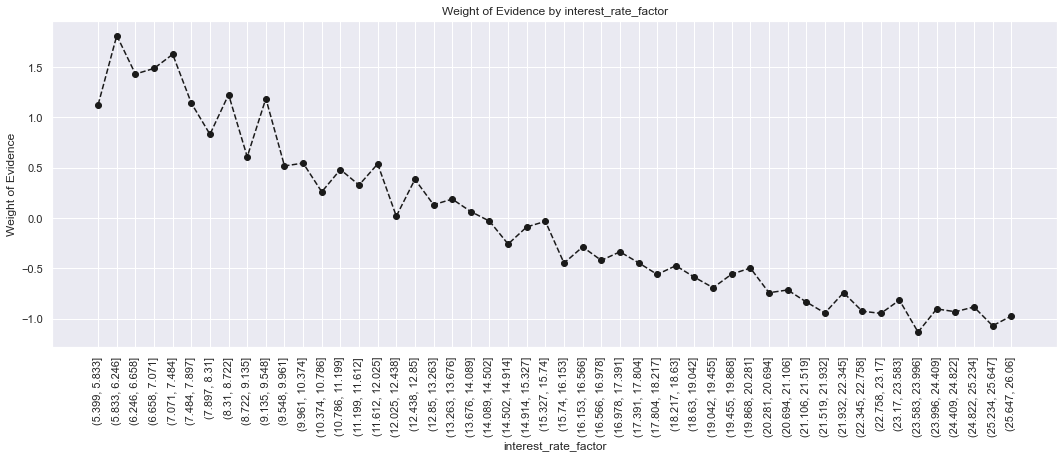

In [101]:
df_WoE_plot(df_Interest_rate, 90)

The plot above shows that the relationship between WoE and Interest rate is almost monotonic, that means, the greater the Interest
rate the lower the WoE and the higher the Probability of default. The presence of monotonic relationship makes it easier to
determine the boundaries of the intervals.

The first 10 points shows an up and down intervals, this cause us to look at the number of observations. We can conclude that 
there's no big difference in number of observations between them therefore we can make them to be one category, the cut-off
of this will be between 10th and 11th category is 9.548. The following categories will be thus: 9.548 >= 12.025, 12.025 >= 15.740,
15.740 >= 20.281 and greater than 20.281    
    

In [102]:
df_input_prep['interest:<9.548'] = np.where((df_input_prep['int_rate'] <= 9.548),1 ,0)
df_input_prep['interest:9.548-12.025'] = np.where((df_input_prep['int_rate'] > 9.548) & (df_input_prep['int_rate'] <= 12.025)
                                                  ,1 ,0)
df_input_prep['interest:12.025-15.740'] = np.where((df_input_prep['int_rate'] > 12.025) & (df_input_prep['int_rate'] <= 15.740)
                                                  ,1 ,0)
df_input_prep['interest:15.740-20.281'] = np.where((df_input_prep['int_rate'] > 15.740) & (df_input_prep['int_rate'] <= 20.281)
                                                  ,1 ,0)
df_input_prep['interest:9.548-12.025'] = np.where((df_input_prep['int_rate'] > 20.281),1 ,0)

In [103]:
# Let's do the same for funded amount

df_input_prep['funded_amnt'].unique()

array([24000, 10000, 20425, ..., 34650, 32775,   950], dtype=int64)

In [104]:
df_input_prep['funded_amnt_factor'] = pd.cut(df_input_prep['funded_amnt'], 50)
df_FundedAmnt_WoE = WoE_ordered_continuous(df_input_prep, 'funded_amnt_factor', df_targets_prep)
df_FundedAmnt_WoE

,funded_amnt_factor,NumOfObser,PropOfGood,PropObs,NumGoodBorrowers,NumBadBorrowers,PercntcOfGoodPerGrade,PercntOfBadPerGrade,WoE,DiffOfProprGood,DiffInWoE,IV
0,"(465.5, 1190.0]",1224,0.905229,0.003281,1108.0,116.0,0.003335,0.002845,0.158977,NaN,NaN,0.014139
1,"(1190.0, 1880.0]",3028,0.903897,0.008117,2737.0,291.0,0.008238,0.007136,0.143549,0.001332,0.015427,0.014139
2,"(1880.0, 2570.0]",6018,0.893819,0.016133,5379.0,639.0,0.016190,0.015670,0.032608,0.010078,0.110941,0.014139
3,"(2570.0, 3260.0]",7248,0.889073,0.019430,6444.0,804.0,0.019395,0.019717,-0.016440,0.004746,0.049048,0.014139
4,"(3260.0, 3950.0]",4751,0.891602,0.012736,4236.0,515.0,0.012749,0.012629,0.009463,0.002529,0.025902,0.014139
5,"(3950.0, 4640.0]",9023,0.890945,0.024189,8039.0,984.0,0.024196,0.024131,0.002689,0.000656,0.006774,0.014139
6,"(4640.0, 5330.0]",15903,0.892159,0.042632,14188.0,1715.0,0.042703,0.042057,0.015238,0.001213,0.012549,0.014139
7,"(5330.0, 6020.0]",17236,0.906069,0.046206,15617.0,1619.0,0.047004,0.039703,0.168806,0.013910,0.153568,0.014139
8,"(6020.0, 6710.0]",6914,0.887619,0.018535,6137.0,777.0,0.018471,0.019054,-0.031094,0.018449,0.199900,0.014139
9,"(6710.0, 7400.0]",11806,0.898018,0.031649,10602.0,1204.0,0.031910,0.029526,0.077648,0.010399,0.108742,0.014139


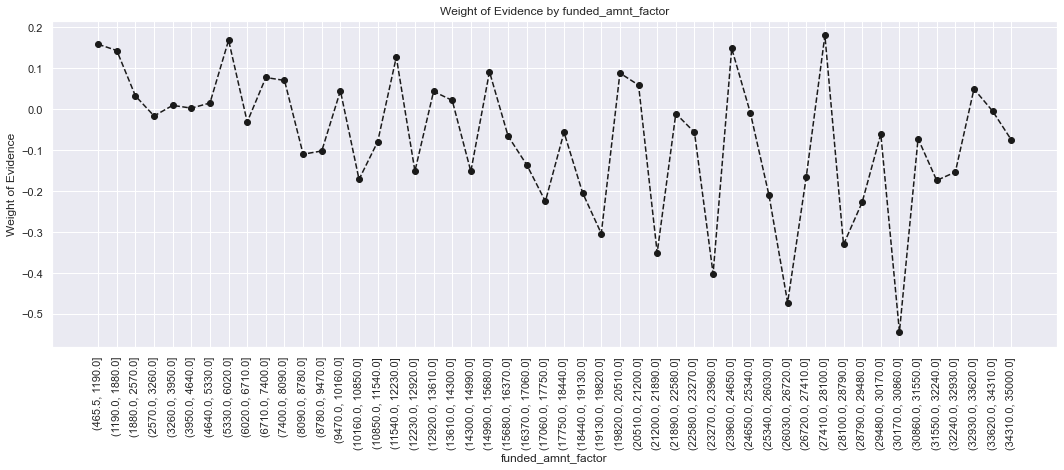

In [105]:
df_WoE_plot(df_FundedAmnt_WoE, 90)

The above plot shows that there's no relationship between the WoE and the independent variables. Thus we cannot use the amount 
funded variable.

In [106]:
# Let's do the same for annual income

df_input_prep['annual_incm_factor'] = pd.cut(df_input_prep['annual_inc'], 50)
df_Annual_incm_WoE = WoE_ordered_continuous(df_input_prep, 'annual_incm_factor', df_targets_prep)
df_Annual_incm_WoE

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,annual_incm_factor,NumOfObser,PropOfGood,PropObs,NumGoodBorrowers,NumBadBorrowers,PercntcOfGoodPerGrade,PercntOfBadPerGrade,WoE,DiffOfProprGood,DiffInWoE,IV
0,"(-5243.882, 144693.64]",351904,0.888566,0.943372,312690.0,39214.0,0.941129,0.961646,-0.021567,NaN,NaN,inf
1,"(144693.64, 287491.28]",19004,0.925437,0.050945,17587.0,1417.0,0.052933,0.034749,0.420873,0.036871,0.442440,inf
2,"(287491.28, 430288.92]",1525,0.930492,0.004088,1419.0,106.0,0.004271,0.002599,0.496524,0.005055,0.075651,inf
3,"(430288.92, 573086.56]",332,0.939759,0.000890,312.0,20.0,0.000939,0.000490,0.649526,0.009267,0.153002,inf
4,"(573086.56, 715884.2]",112,0.883929,0.000300,99.0,13.0,0.000298,0.000319,-0.067574,0.055830,0.717100,inf
5,"(715884.2, 858681.84]",65,0.892308,0.000174,58.0,7.0,0.000175,0.000172,0.016788,0.008379,0.084362,inf
6,"(858681.84, 1001479.48]",39,0.974359,0.000105,38.0,1.0,0.000114,0.000025,1.539841,0.082051,1.523053,inf
7,"(1001479.48, 1144277.12]",10,1.000000,0.000027,10.0,0.0,0.000030,0.000000,inf,0.025641,inf,inf
8,"(1144277.12, 1287074.76]",12,1.000000,0.000032,12.0,0.0,0.000036,0.000000,inf,0.000000,NaN,inf
9,"(1287074.76, 1429872.4]",6,1.000000,0.000016,6.0,0.0,0.000018,0.000000,inf,0.000000,NaN,inf


The above plot shows that the 1st category has more that 90% of all our observations thus we can try to increase the categories 
to cut.

In [107]:
# Let's increase the number of categories to cut

df_input_prep['annual_incm_factor'] = pd.cut(df_input_prep['annual_inc'], 100)
df_Annual_incm_WoE = WoE_ordered_continuous(df_input_prep, 'annual_incm_factor', df_targets_prep)
df_Annual_incm_WoE

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,annual_incm_factor,NumOfObser,PropOfGood,PropObs,NumGoodBorrowers,NumBadBorrowers,PercntcOfGoodPerGrade,PercntOfBadPerGrade,WoE,DiffOfProprGood,DiffInWoE,IV
0,"(-5243.882, 73294.82]",231445,0.875901,0.620449,202723.0,28722.0,0.610152,0.704350,-0.143568,NaN,NaN,inf
1,"(73294.82, 144693.64]",120459,0.912900,0.322922,109967.0,10492.0,0.330977,0.257296,0.251822,0.036998,0.395390,inf
2,"(144693.64, 216092.46]",15885,0.925087,0.042584,14695.0,1190.0,0.044229,0.029182,0.415809,0.012187,0.163987,inf
3,"(216092.46, 287491.28]",3119,0.927220,0.008361,2892.0,227.0,0.008704,0.005567,0.447009,0.002134,0.031200,inf
4,"(287491.28, 358890.1]",1117,0.929275,0.002994,1038.0,79.0,0.003124,0.001937,0.477858,0.002055,0.030850,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(6784783.9, 6856182.72]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
96,"(6856182.72, 6927581.54]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
97,"(6927581.54, 6998980.36]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
98,"(6998980.36, 7070379.18]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


Again we can see the above plot shows a large number of observations in the first category. It will be best to put people with
high income first than investigate people with low income. The 1st 2 categories contains alot of observations and the number
of observations decrease as the annual income increase. We going to creat a category for people with high income now than see
how we can categorise the low income. So we will at the threshold of people earning lower than 140,000.00 as low income and 
140,000.00+ as higher income.

In [108]:
# Let's make a df for low income

df_input_prep_low_incm = df_input_prep.loc[df_input_prep['annual_inc'] <= 140000.00, :]

In [109]:
# Let's calculate the WoE for new df

df_input_prep_low_incm['annual_incm_factor'] = pd.cut(df_input_prep_low_incm['annual_inc'], 50)
df_input_prep_low_incm['annual_incm_factor']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


427211     (76472.16, 79234.24]
206088    (109617.12, 112379.2]
136020      (81996.32, 84758.4]
412305      (40565.12, 43327.2]
36159      (93044.64, 95806.72]
                  ...          
259178      (70948.0, 73710.08]
365838      (70948.0, 73710.08]
131932     (79234.24, 81996.32]
146867      (68185.92, 70948.0]
121958      (40565.12, 43327.2]
Name: annual_incm_factor, Length: 351062, dtype: category
Categories (50, interval[float64]): [(1757.896, 4658.08] < (4658.08, 7420.16] < (7420.16, 10182.24] < (10182.24, 12944.32] ... (128951.68, 131713.76] < (131713.76, 134475.84] < (134475.84, 137237.92] < (137237.92, 140000.0]]

In [110]:
df_Annual_income = WoE_ordered_continuous(df_input_prep_low_incm, 'annual_incm_factor', df_targets_prep[df_targets_prep.index])
df_Annual_income

,annual_incm_factor,NumOfObser,PropOfGood,PropObs,NumGoodBorrowers,NumBadBorrowers,PercntcOfGoodPerGrade,PercntOfBadPerGrade,WoE,DiffOfProprGood,DiffInWoE,IV
0,"(1757.896, 4658.08]",15,0.800000,0.000043,12.0,3.0,0.000038,0.000077,-0.689458,NaN,NaN,0.049818
1,"(4658.08, 7420.16]",40,0.750000,0.000114,30.0,10.0,0.000096,0.000256,-0.977140,0.050000,0.287682,0.049818
2,"(7420.16, 10182.24]",287,0.874564,0.000818,251.0,36.0,0.000805,0.000920,-0.133818,0.124564,0.843322,0.049818
3,"(10182.24, 12944.32]",547,0.828154,0.001558,453.0,94.0,0.001452,0.002402,-0.503155,0.046411,0.369337,0.049818
4,"(12944.32, 15706.4]",1210,0.830579,0.003447,1005.0,205.0,0.003222,0.005238,-0.486019,0.002425,0.017135,0.049818
5,"(15706.4, 18468.48]",1522,0.847569,0.004335,1290.0,232.0,0.004136,0.005928,-0.360092,0.016990,0.125927,0.049818
6,"(18468.48, 21230.56]",2928,0.855533,0.008340,2505.0,423.0,0.008031,0.010809,-0.297080,0.007964,0.063012,0.049818
7,"(21230.56, 23992.64]",2495,0.844489,0.007107,2107.0,388.0,0.006755,0.009914,-0.383737,0.011044,0.086657,0.049818
8,"(23992.64, 26754.72]",7016,0.848632,0.019985,5954.0,1062.0,0.019088,0.027137,-0.351843,0.004143,0.031894,0.049818
9,"(26754.72, 29516.8]",5643,0.857345,0.016074,4838.0,805.0,0.015510,0.020570,-0.282338,0.008714,0.069505,0.049818


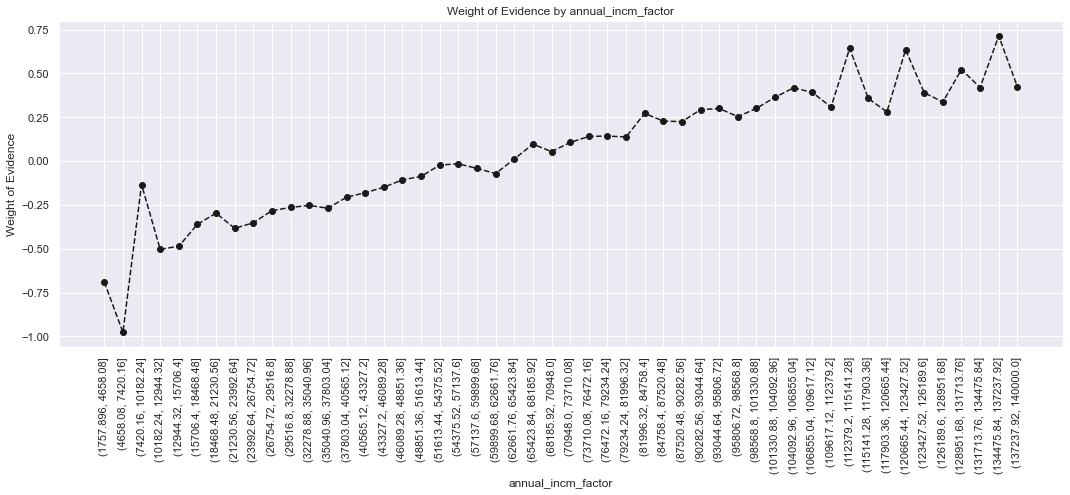

In [111]:
df_WoE_plot(df_Annual_income, 90)

What we see above is that WoE increases monotonically with income. So our categories will be thus: 0-20, then from 20 - 100 we 
will have equal 10k intervals, 100 - 120, 120 - 140 then 140+.

In [112]:
df_input_prep['annaul_incm:<20k'] = np.where((df_input_prep['annual_inc'] <= 20000), 1, 0)
df_input_prep['annual_inmcm:20k-30k'] = np.where((df_input_prep['annual_inc'] > 20000 & (df_input_prep['annual_inc'] <= 30000)),
                                                1, 0)
df_input_prep['annual_inmcm:30k-40k'] = np.where((df_input_prep['annual_inc'] > 30000 & (df_input_prep['annual_inc'] <= 40000)),
                                                1, 0)
df_input_prep['annual_inmcm:40k-50k'] = np.where((df_input_prep['annual_inc'] > 40000 & (df_input_prep['annual_inc'] <= 50000)),
                                                1, 0)
df_input_prep['annual_inmcm:50k-60k'] = np.where((df_input_prep['annual_inc'] > 50000 & (df_input_prep['annual_inc'] <= 60000)),
                                                1, 0)
df_input_prep['annual_inmcm:70k-80k'] = np.where((df_input_prep['annual_inc'] > 70000 & (df_input_prep['annual_inc'] <= 80000)),
                                                1, 0)
df_input_prep['annual_inmcm:80k-90k'] = np.where((df_input_prep['annual_inc'] > 80000 & (df_input_prep['annual_inc'] <= 90000)),
                                                1, 0)
df_input_prep['annual_inmcm:90k-100k'] = np.where((df_input_prep['annual_inc'] > 90000&(df_input_prep['annual_inc'] <= 100000)),
                                                1, 0)
df_input_prep['annual_inmcm:100k-120k'] = np.where((df_input_prep['annual_inc'] > 100000 & (df_input_prep['annual_inc'] <= 120000)),
                                                1, 0)
df_input_prep['annual_inmcm:120k-140k'] = np.where((df_input_prep['annual_inc'] > 120000 & (df_input_prep['annual_inc'] <= 140000)),
                                                1, 0)
df_input_prep['annual_inmcm:>140k'] = np.where((df_input_prep['annual_inc'] > 140000),1, 0)

In [113]:
# Let's do it for 'months since last deliquency'

df_months_last_delinq = df_input_prep[pd.notnull(df_input_prep['mths_since_last_delinq'])]
df_months_last_delinq['months_last_deliq_factor'] = pd.cut(df_months_last_delinq['mths_since_last_delinq'], 50)
df_Delinq_WoE = WoE_ordered_continuous(df_months_last_delinq, 'months_last_deliq_factor', 
                                       df_targets_prep[df_months_last_delinq.index])
df_Delinq_WoE

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,months_last_deliq_factor,NumOfObser,PropOfGood,PropObs,NumGoodBorrowers,NumBadBorrowers,PercntcOfGoodPerGrade,PercntOfBadPerGrade,WoE,DiffOfProprGood,DiffInWoE,IV
0,"(-0.188, 3.76]",5277,0.871518,0.030531,4599.0,678.0,0.029814,0.036481,-0.201825,NaN,NaN,inf
1,"(3.76, 7.52]",11167,0.887615,0.064608,9912.0,1255.0,0.064256,0.067528,-0.049661,0.016097,0.152164,inf
2,"(7.52, 11.28]",13306,0.892830,0.076983,11880.0,1426.0,0.077014,0.076729,0.003711,0.005215,0.053372,inf
3,"(11.28, 15.04]",13216,0.888847,0.076462,11747.0,1469.0,0.076152,0.079042,-0.037256,0.003983,0.040967,inf
4,"(15.04, 18.8]",9337,0.894934,0.054020,8356.0,981.0,0.054169,0.052785,0.025891,0.006087,0.063147,inf
5,"(18.8, 22.56]",11641,0.892707,0.067350,10392.0,1249.0,0.067368,0.067205,0.002421,0.002227,0.023470,inf
6,"(22.56, 26.32]",10887,0.896298,0.062988,9758.0,1129.0,0.063258,0.060748,0.040483,0.003592,0.038062,inf
7,"(26.32, 30.08]",10560,0.895076,0.061096,9452.0,1108.0,0.061274,0.059618,0.027398,0.001223,0.013085,inf
8,"(30.08, 33.84]",7576,0.902191,0.043832,6835.0,741.0,0.044309,0.039871,0.105539,0.007115,0.078141,inf
9,"(33.84, 37.6]",9795,0.897397,0.056670,8790.0,1005.0,0.056982,0.054076,0.052355,0.004794,0.053184,inf


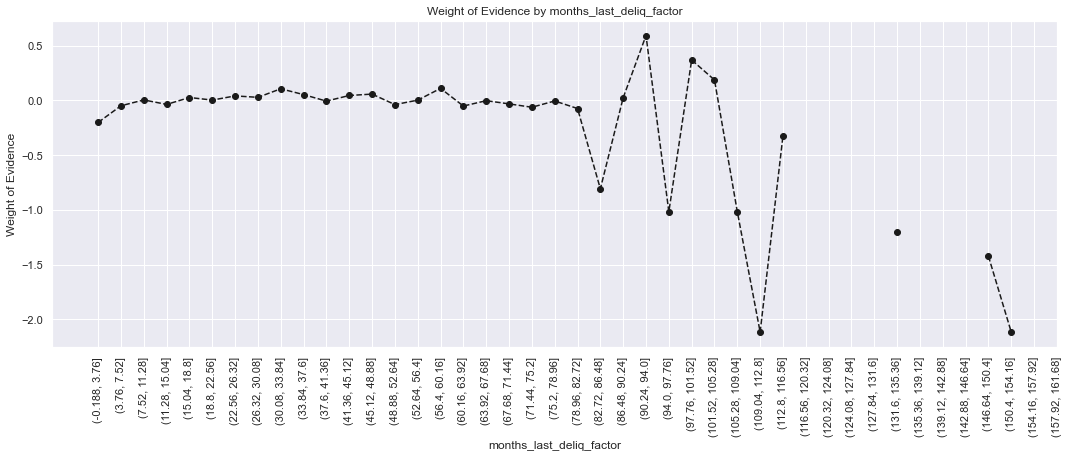

In [114]:
df_WoE_plot(df_Delinq_WoE, 90)

In [115]:
df_input_prep['mnths_last_last_delinq:missing'] = np.where((df_input_prep['mths_since_last_delinq'].isnull()),1 ,0)
df_input_prep['mnths_last_last_delinq:0-3'] = np.where((df_input_prep['mths_since_last_delinq'] >= 0) & (df_input_prep['mths_since_last_delinq'] <= 3)
                                                       ,1, 0)
df_input_prep['mnths_last_last_delinq:4-30'] = np.where((df_input_prep['mths_since_last_delinq'] >= 4) & (df_input_prep['mths_since_last_delinq'] <= 30),
                                                      1, 0)
df_input_prep['mnths_last_last_delinq:31-56'] = np.where((df_input_prep['mths_since_last_delinq'] >= 31) & (df_input_prep['mths_since_last_delinq'] <= 56),
                                                      1, 0)
df_input_prep['mnths_last_last_delinq:>56'] = np.where((df_input_prep['mths_since_last_delinq'] >= 57), 1, 0)                                                           

# Preprocessing the Test data

Remember that we used this code 'df_input_prep = df_inputs_train and df_targets_prep = df_targets_train'to get the dummy
variables. The 'df_input_prep' contained the old data set with new dummy variables, so that means we can use the same code
to create the same dummy variables for the test dats set. We don't have to calculate the WoE or come up with dummy variable for test data since test data set 
is only used to test and assess a model. Before we use the same code, we have to save the train data in a new variable.

In [116]:
# Saving the 'df_input_prep'

loan_data_inputs_train = df_input_prep
#loan_data_inputs_test = df_input_prep

# Save everything  to csv file

In [117]:
#loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
#df_targets_train.to_csv('df_targets_train.csv')
#loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
#df_targets_test.to_csv('df_targets_test.csv')